In [ ]:
"""
Use movie_data_general_cleaned to build a Linear Regression model for general movies.

Intermediate feature engineering: explore each categorical feature

functions used:
get_Xy(df) from model.py
get_score(X_train,X_val,y_train,y_val) from model.py
categorical_multilabel(X_train,X_val,X_test,cat_variable) from model.py
categorical_singlelabel(X_train,X_val,X_test,cat_variable) from model.py


Result: including distributor got a score of 0.5

"""

In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

import patsy
import scipy.stats as stats

import sys
sys.path.append('/Users/katiehuang/Documents/metis/projects/onl_ds5_project_2/py')
import importlib
from model import *

## 1. Prepare data

In [486]:
# Load the cleaned complete data
all_df = pd.read_pickle('../data/movie_data_general_cleaned')

# Separate features and target
con_feature = ['budget','runtime','release_year']
cat_feature = ['MPAA','genre','distributor','language','country','keywords']
target_candidate = ['opening_weekend_usa','gross_usa','gross_world','rating','vote']

In [659]:
# Load top 100 actor list
actor_list = pd.read_pickle('../dump/actor_top100_list')

## 2. Intermediate Feature Engineering: Categorical features
Use `OneHotEncoder` or `pd.get_dummies(df['column'])` to treat categorical variables

### 1. genre

In [291]:
# Get the data from all_df with both continuous and selected categorical variable
df = all_df[['opening_weekend_usa'] + con_feature + ['genre']]

genre_list = []
for genre in df.genre:
    genre_list += genre
len(set(genre_list))

from collections import Counter
Counter(genre_list)

Counter({'Action': 1369,
         'Sci-Fi': 400,
         'Thriller': 840,
         'Drama': 2554,
         'Family': 362,
         'Comedy': 2100,
         'Crime': 1049,
         'Biography': 350,
         'Adventure': 1046,
         'Fantasy': 473,
         'War': 69,
         'Mystery': 482,
         'Horror': 570,
         'Romance': 881,
         'Animation': 273,
         'Musical': 51,
         'Western': 32,
         'History': 142,
         'Music': 154,
         'Sport': 140,
         'Film-Noir': 4})

In [292]:
# Get the data from all_df with both continuous and selected categorical variable
df = all_df[['opening_weekend_usa'] + con_feature + ['genre']]
X, y = get_Xy(df)

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)

In [293]:
# Input: X_train,X_val,X_test,categorical_variable
# Processing: preprocessing the three sets separately:
# 1. Separate continuous and categorical variable
# 2. Scaling + polynomial fit the conitnuous variables and get_dummies on the categorical variable
# 3. Combine back the continuous and categorical data
# Return: tranformed X_train, X_val, X_test

X_train,X_val,X_test = categorical_multilabel(X_train,X_val,X_test,'genre')

In [294]:
# Check sets shape
X_train.shape, X_val.shape, X_test.shape

((3067, 31), (1023, 31), (1023, 31))


Train R^2 score was: 0.5075814468737415
Validation R^2 score was: 0.4826613912179534
RMSE: 11.30 



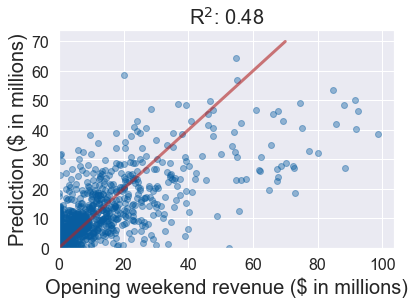

In [295]:
fig,lr,y_pred = get_score(X_train, X_val, y_train, y_val) # polynomial + scaling

In [296]:
# Find coefficient of each feature
feature = X_train.columns
coef = pd.DataFrame(list(zip((feature),lr.coef_)),columns = ['Feature','Coefficient']).\
sort_values(['Coefficient'],ascending=False)
top_feature = coef.head(10)

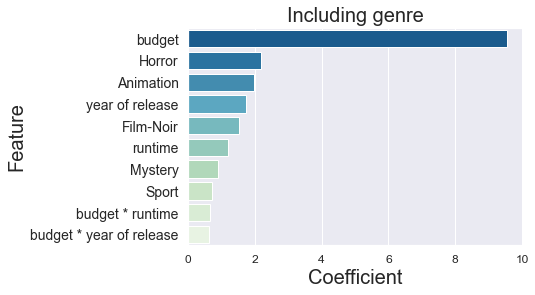

In [297]:
# Generate coef plots for the 3 continuous features

p = sns.color_palette("GnBu_r",10)
sns.set_palette(p)

fig, ax = plt.subplots()
sns.barplot(y="Feature", x= 'Coefficient', data = top_feature,orient='h')
ax.set_title('Including genre',fontsize=20)
ax.set_ylabel('Feature',fontsize=20)
ax.set_xlabel('Coefficient',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

ax.set_yticklabels(['budget',
 'Horror',
 'Animation',
 'year of release',
 'Film-Noir',
 'runtime',
 'Mystery',
 'Sport',
 'budget * runtime',
 'budget * year of release'])

# fig.savefig('../plot/lr_poly_coef.pdf', bbox_inches='tight', transparent=True)

### 2. language

In [435]:
# Get the data from all_df with both continuous and selected categorical variable
df = all_df[['opening_weekend_usa'] + con_feature + ['language']].copy()

cat_list = []
for cat in df.language:
    cat_list += cat
len(set(cat_list))

# Find most common
from collections import Counter
top = [x for x, x_count in Counter(cat_list).most_common(15)]

# The rest will go to "Other"
df['language']= df.language.apply(lambda x:\
                            [language if language in top else 'Other' for language in x])
top

['English',
 'Spanish',
 'French',
 'German',
 'Italian',
 'Russian',
 'Japanese',
 'Arabic',
 'Mandarin',
 'Latin',
 'Cantonese',
 'Hebrew',
 'Portuguese',
 'Ukrainian',
 'Korean']

In [436]:
# df = all_df[['opening_weekend_usa'] + con_feature + ['language']]
X, y = get_Xy(df)

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)

In [437]:
# Input: X_train,X_val,X_test,categorical_variable
# Processing: preprocessing the three sets separately:
# 1. Separate continuous and categorical variable
# 2. Scaling + polynomial fit the conitnuous variables and get_dummies on the categorical variable
# 3. Combine back the continuous and categorical data
# Return: tranformed X_train, X_val, X_test

X_train,X_val,X_test = categorical_multilabel(X_train,X_val,X_test,'language')

In [438]:
# Check sets shape
X_train.shape, X_val.shape, X_test.shape

((3067, 26), (1023, 26), (1023, 26))


Train R^2 score was: 0.4782054404539231
Validation R^2 score was: 0.491705638119337
RMSE: 11.20 



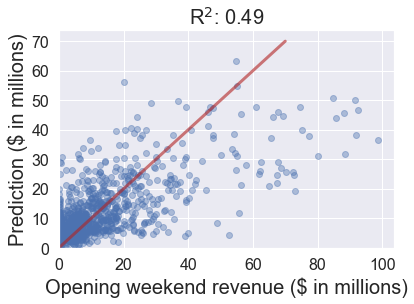

In [439]:
fig,lr,y_pred = get_score(X_train, X_val, y_train, y_val)

In [447]:
# Find coefficient of each feature
feature = X_train.columns
coef = pd.DataFrame(list(zip((feature),lr.coef_)),columns = ['Feature','Coefficient']).\
sort_values(['Coefficient'],ascending=False)
top_feature = coef.head(10)
top_feature.Feature.tolist()
top_feature

,Feature,Coefficient
17,budget,10.468255
12,Portuguese,4.266588
6,Italian,1.979248
7,Japanese,1.922515
15,Ukrainian,1.843317
14,Spanish,1.784068
19,release_year,1.506539
22,budget release_year,0.737339
21,budget runtime,0.706180
5,Hebrew,0.505394


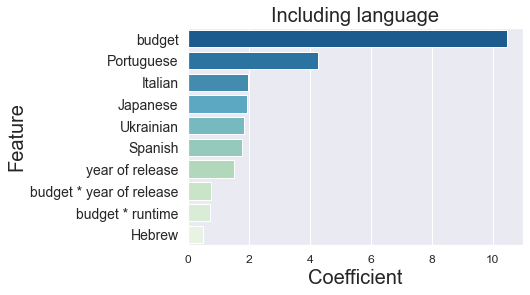

In [448]:
# Generate coef plots for the 3 continuous features

p = sns.color_palette("GnBu_r",10)
sns.set_palette(p)

fig, ax = plt.subplots()
sns.barplot(y="Feature", x= 'Coefficient', data = top_feature,orient='h')
ax.set_title('Including language',fontsize=20)
ax.set_ylabel('Feature',fontsize=20)
ax.set_xlabel('Coefficient',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

ax.set_yticklabels(['budget',
 'Portuguese',
 'Italian',
 'Japanese',
 'Ukrainian',
 'Spanish',
 'year of release',
 'budget * year of release',
 'budget * runtime',
 'Hebrew']);

# fig.savefig('../plot/lr_coef.pdf', bbox_inches='tight', transparent=True)

### 3. country

In [449]:
# Get the data from all_df with both continuous and selected categorical variable
df = all_df[['opening_weekend_usa'] + con_feature + ['country']].copy()

cat_list = []
for cat in df.country:
    cat_list += cat
len(set(cat_list))

# Find most common
from collections import Counter
top = [x for x, x_count in Counter(cat_list).most_common(15)]

# The rest will go to "Other"
df['language']= df.country.apply(lambda x:\
                            [language if language in top else 'Other' for language in x])
top

['USA',
 'UK',
 'Canada',
 'Germany',
 'France',
 'Japan',
 'Australia',
 'China',
 'Mexico',
 'Spain',
 'Italy',
 'HongKong',
 'India',
 'Ireland',
 'NewZealand']

In [450]:
# df = all_df[['opening_weekend_usa'] + con_feature + ['language']]
X, y = get_Xy(df)

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)

In [451]:
# Input: X_train,X_val,X_test,categorical_variable
# Processing: preprocessing the three sets separately:
# 1. Separate continuous and categorical variable
# 2. Scaling + polynomial fit the conitnuous variables and get_dummies on the categorical variable
# 3. Combine back the continuous and categorical data
# Return: tranformed X_train, X_val, X_test

X_train,X_val,X_test = categorical_multilabel(X_train,X_val,X_test,'language')

In [452]:
# Check sets shape
X_train.shape, X_val.shape, X_test.shape

((3067, 26), (1023, 26), (1023, 26))


Train R^2 score was: 0.4928810038900102
Validation R^2 score was: 0.4927801779841481
RMSE: 11.19 



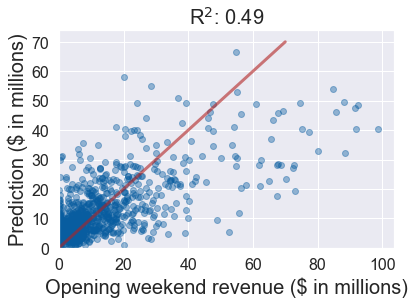

In [453]:
fig,lr,y_pred = get_score(X_train, X_val, y_train, y_val)

In [456]:
# Find coefficient of each feature
feature = X_train.columns
coef = pd.DataFrame(list(zip((feature),lr.coef_)),columns = ['Feature','Coefficient']).\
sort_values(['Coefficient'],ascending=False)
top_feature = coef.head(10)
top_feature
# top_feature.Feature.tolist()

,Feature,Coefficient
17,budget,1.070272e+01
9,Japan,4.226246e+00
19,release_year,1.842879e+00
10,Mexico,1.277931e+00
22,budget release_year,9.049495e-01
1,Canada,8.267656e-01
21,budget runtime,7.796514e-01
25,release_year^2,1.451333e-01
11,NewZealand,8.449151e-02
16,1,1.332268e-15


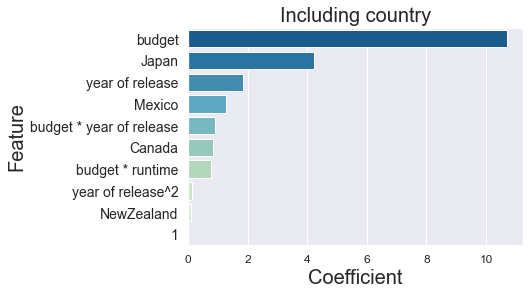

In [458]:
# Generate coef plots for the 3 continuous features

p = sns.color_palette("GnBu_r",10)
sns.set_palette(p)

fig, ax = plt.subplots()
sns.barplot(y="Feature", x= 'Coefficient', data = top_feature,orient='h')
ax.set_title('Including country',fontsize=20)
ax.set_ylabel('Feature',fontsize=20)
ax.set_xlabel('Coefficient',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

ax.set_yticklabels(['budget',
 'Japan',
 'year of release',
 'Mexico',
 'budget * year of release',
 'Canada',
 'budget * runtime',
 'year of release^2',
 'NewZealand',
 '1']);

# fig.savefig('../plot/lr_coef.pdf', bbox_inches='tight', transparent=True)

### 4. MPAA rating

In [429]:
# Get the data from all_df with both continuous and selected categorical variable
df = all_df[['opening_weekend_usa'] + con_feature + ['MPAA']].copy()

top = df['MPAA'].value_counts().index.tolist()[:4]
discard = list(set(df['MPAA'].unique()).difference(set(top)))

# The rest will go to "Other"
all_df.MPAA.replace(discard,'Other',inplace=True)

In [430]:
# Get the data from all_df with both continuous and selected categorical variable
X, y = get_Xy(df)

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)

In [431]:
X_train.shape

(3067, 4)

In [432]:
%run -i "../py/model.py"

In [433]:
# Input: X_train,X_val,X_test,categorical_variable
# Processing: preprocessing the three sets separately:
# 1. Separate continuous and categorical variable
# 2. Scaling + polynomial fit the conitnuous variables and get_dummies on the categorical variable
# 3. Combine back the continuous and categorical data
# Return: tranformed X_train, X_val, X_test

X_train,X_val,X_test = categorical_singlelabel(X_train,X_val,X_test,'MPAA')


Train R^2 score was: 0.4725785718642258
Validation R^2 score was: -1.8813351359462027e+21
RMSE: 681194527277.66 



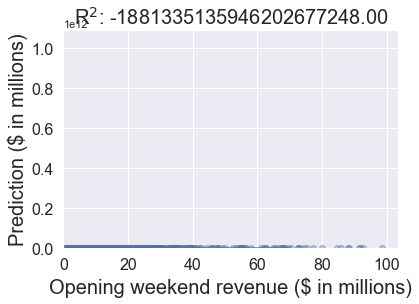

In [434]:
fig,lr,y_pred = get_score(X_train, X_val, y_train, y_val)

In [288]:
# Validation R^2 negative: overfitting

### 5. distributor

In [642]:
# Get the data from all_df with both continuous and selected categorical variable

# Test the optimal number for category
cat_variable = 'distributor'
df = all_df[['opening_weekend_usa'] + con_feature + [cat_variable]].copy()
%run -i "../py/model.py"
opt_cat_number(df,'distributor');

Optimal number of categories to keep is 7
Best score is 0.503


In [648]:
# Will keep top 64 distributors
cat_variable = 'distributor'
df = all_df[['opening_weekend_usa'] + con_feature + [cat_variable]].copy()

top = df['distributor'].value_counts().index.tolist()[:15]
discard = list(set(df['distributor'].unique()).difference(set(top)))

# The rest will go to "Other"
all_df.distributor.replace(discard,'Other',inplace=True)

In [649]:
# Get the data from all_df with both continuous and selected categorical variable
X, y = get_Xy(df)

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)

In [650]:
%run -i "../py/model.py"

In [651]:
# Input: X_train,X_val,X_test,categorical_variable
# Processing: preprocessing the three sets separately:
# 1. Separate continuous and categorical variable
# 2. Scaling + polynomial fit the conitnuous variables and get_dummies on the categorical variable
# 3. Combine back the continuous and categorical data
# Return: tranformed X_train, X_val, X_test

X_train,X_val,X_test = categorical_singlelabel(X_train,X_val,X_test,'distributor')


Train R^2 score was: 0.4843430055189122
Validation R^2 score was: 0.5030977206193024
RMSE: 11.07 



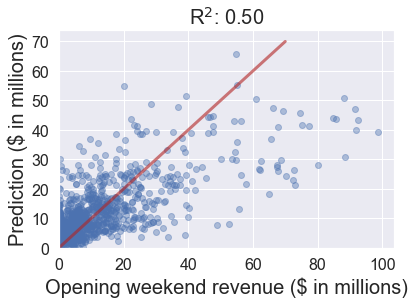

In [652]:
fig,lr,y_pred = get_score(X_train, X_val, y_train, y_val)

In [655]:
# Find coefficient of each feature
feature = X_train.columns
coef = pd.DataFrame(list(zip((feature),lr.coef_)),columns = ['Feature','Coefficient']).\
sort_values(['Coefficient'],ascending=False)
top_feature = coef.head(20)
top_feature
top_feature.Feature.tolist()

['UniversalPictures',
 'TwentiethCenturyFox',
 'NewLineCinema',
 'ParamountPictures',
 'WarnerBros.',
 'ColumbiaPictures',
 'Other',
 'budget',
 'release_year',
 'runtime']

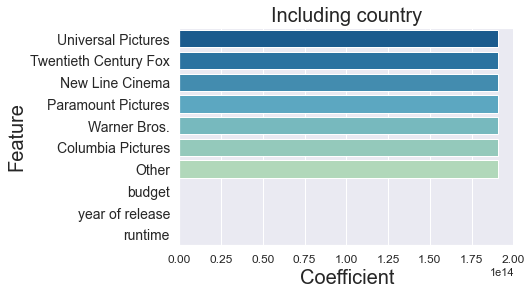

In [656]:
# Generate coef plots for the 3 continuous features

p = sns.color_palette("GnBu_r",10)
sns.set_palette(p)

fig, ax = plt.subplots()
sns.barplot(y="Feature", x= 'Coefficient', data = top_feature,orient='h')
ax.set_title('Including country',fontsize=20)
ax.set_ylabel('Feature',fontsize=20)
ax.set_xlabel('Coefficient',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

ax.set_yticklabels(['Universal Pictures',
 'Twentieth Century Fox',
 'New Line Cinema',
 'Paramount Pictures',
 'Warner Bros.',
 'Columbia Pictures',
 'Other',
 'budget',
 'year of release',
 'runtime']);

# fig.savefig('../plot/lr_coef.pdf', bbox_inches='tight', transparent=True)

### 7. actor

In [664]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['star']]
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)


Train R^2 score was: 0.5078527303155385
Validation R^2 score was: 0.4747436035275776
RMSE: 11.38 



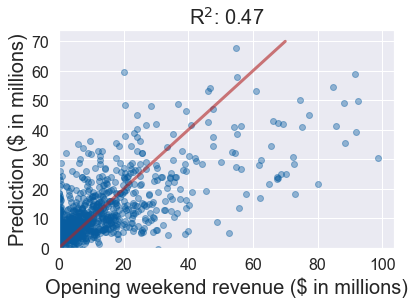

In [680]:
# Get the data from all_df with both continuous and categorical variables
cat_variable = 'star'
df = all_df[['opening_weekend_usa'] + con_feature + [cat_variable]].copy()

# Will keep top 100 actors
top = actor_list

# The rest will go to "Other"
df['star']= df.star.apply(lambda x:\
                            [cat if cat in top else 'Other' for cat in x])


# Get the data from all_df with both continuous and selected categorical variable
X, y = get_Xy(df)

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)

# Input: X_train,X_val,X_test,categorical_variable
# Processing: preprocessing the three sets separately:
# 1. Separate continuous and categorical variable
# 2. Scaling + polynomial fit the conitnuous variables and get_dummies on the categorical variable
# 3. Combine back the continuous and categorical data
# Return: tranformed X_train, X_val, X_test
X_train,X_val,X_test = categorical_multilabel(X_train,X_val,X_test,'star')


# Evaluation
fig,lr,y_pred = get_score(X_train, X_val, y_train, y_val)

In [681]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['star']]
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [682]:
#
## scaling + poly

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['star'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_train_genre.columns).intersection(set(actor_list)))
X_train_genre = X_train_genre[keep_actor]

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

X_train_poly = poly.fit_transform(X_train_con_scaled)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names(X_train_con.columns), index=X_train_con.index)


#Combine
# X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)
X_train = pd.concat([X_train_genre,X_train_poly_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['star'].str.join(sep='*').str.get_dummies(sep='*')
keep_actor = list(set(X_val_genre.columns).intersection(set(actor_list)))
X_val_genre = X_val_genre[keep_actor]

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

X_val_poly = poly.transform(X_val_con_scaled)
X_val_poly_df = pd.DataFrame(X_val_poly, columns=poly.get_feature_names(X_val_con.columns), index=X_val_con.index)


#Combine
# X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)
X_val = pd.concat([X_val_genre,X_val_poly_df],axis=1)

# Find the common columns to keep
keep = list(set(X_train.columns).intersection(set(X_val.columns)))
X_train = X_train[keep]
X_val = X_val[keep]


Train R^2 score was: 0.5083832805161739
Validation R^2 score was: 0.5033654917990881
RMSE: 11.24 



(<Figure size 432x288 with 1 Axes>,
 LinearRegression(),
 array([19.83007812,  1.94140625,  6.18554688, ...,  9.27246094,
        23.56445312, 16.23242188]))

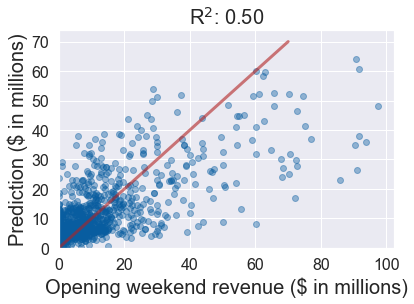

In [683]:
get_score(X_train, X_val, y_train, y_val)

In [684]:
# Cross-validation
# Will not use X_test, y_test
lr = LinearRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
# mean of val_score
print("Mean of validation score is:", np.mean(result))
print(result)

Mean of validation score is: 0.45180570834899303
[0.47509383 0.47124833 0.45221064 0.45278185 0.40769389]
